Работа с таймсериями

1)	Постройте торговлю фондом VFINX так, чтобы максимизировать коэффициент Шарпа (не менее 0.60) при этом минимально теряя в доходности по сравнению со стратегией BuyAndHold данного фонда (CAGR BuyAndHold 10.9%).
2)	Для расчёта коэффициента Шарпа получите 10-летние доходности гос. облигаций США самостоятельно. 
3)	Учтите дивиденды. Income tax = 0%. Реинвестирование происходит или на следующий день, после ex-dividend даты, или вы можете накапливать дивиденды и реинвестировать их в день ребалансировки вашей стратегии. 
4)	По сути система должна строиться на аллокации от 100% в фонд VFINX до 100% выхода в кэш. Для простоты расчётов выход в кэш можно считать выходом в доллар США. Не выходить в какие-либо ценные бумаги.

Условия

1)	Комиссии за сделки равны 0. 
2)	Частота сделок не чаще одного раза в неделю, не реже одного раза в год. 
3)	Вы можете использовать данные по закрытиям индекса VIX, которые имеются в файле, можете не использовать. 
4)	Вы можете использовать простейшие подходы, можете использовать ML и нейросети, можете из имеющихся данных генерировать доп. фичи. 
5)	Запрещено использовать короткие продажи. Запрещены “плечи”. Запрещено добавлять фичи из внешних источников. Запрещена обратная связь до конца задания.

Суть

1)	От Вас не требуется построить идеальную торговую систему. Данная задача показывает как Вы подходите к работе с таймсериями, насколько Вы понимаете тему работы с уменьшением/увеличением весов актива, ваше умение работать с Python, осознаёте, что фондовые рынки не являются эргодической структурой.
2)	Докажите и обоснуйте, что Ваша система высоковероятно будет работоспособна ближайшее десятилетие, устойчива и стабильно работает на различных временных периодах и рыночных состояниях. 
3)	Задачу оформите в Jupyter Notebook.
4)	Логику распишите в PowerPoint. 
шите в PowerPoint. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_json('./VFINX.json')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close
1986-01-02,9.969467,9.969467,9.969467,9.969467,0,0.0,0,18.07
1986-01-03,10.035052,10.035052,10.035052,10.035052,0,0.0,0,17.96
1986-01-06,10.030688,10.030688,10.030688,10.030688,0,0.0,0,17.05
1986-01-07,10.179354,10.179354,10.179354,10.179354,0,0.0,0,17.39
1986-01-08,9.899508,9.899508,9.899508,9.899508,0,0.0,0,19.97
...,...,...,...,...,...,...,...,...
2021-01-15,347.940002,347.940002,347.940002,347.940002,0,0.0,0,24.34
2021-01-19,350.779999,350.779999,350.779999,350.779999,0,0.0,0,23.24
2021-01-20,355.670013,355.670013,355.670013,355.670013,0,0.0,0,21.58
2021-01-21,355.809998,355.809998,355.809998,355.809998,0,0.0,0,21.32


In [3]:
# Reset index to the column for convinient operations

df = df.reset_index(names='Date')
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close
0,1986-01-02,9.969467,9.969467,9.969467,9.969467,0,0.0,0,18.07
1,1986-01-03,10.035052,10.035052,10.035052,10.035052,0,0.0,0,17.96
2,1986-01-06,10.030688,10.030688,10.030688,10.030688,0,0.0,0,17.05
3,1986-01-07,10.179354,10.179354,10.179354,10.179354,0,0.0,0,17.39
4,1986-01-08,9.899508,9.899508,9.899508,9.899508,0,0.0,0,19.97
5,1986-01-09,9.812057,9.812057,9.812057,9.812057,0,0.0,0,20.20
6,1986-01-10,9.807683,9.807683,9.807683,9.807683,0,0.0,0,18.45
7,1986-01-13,9.842667,9.842667,9.842667,9.842667,0,0.0,0,18.80
8,1986-01-14,9.842667,9.842667,9.842667,9.842667,0,0.0,0,18.06
9,1986-01-15,9.921375,9.921375,9.921375,9.921375,0,0.0,0,18.87


In [4]:
print(df.info())
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8833 non-null   datetime64[ns]
 1   Open          8833 non-null   float64       
 2   High          8833 non-null   float64       
 3   Low           8833 non-null   float64       
 4   Close         8833 non-null   float64       
 5   Volume        8833 non-null   int64         
 6   Dividends     8833 non-null   float64       
 7   Stock Splits  8833 non-null   int64         
 8   VIX_Close     8833 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 621.2 KB
None



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close
count,8833,8833.000000,8833.000000,8833.000000,8833.000000,8833.0,8833.000000,8833.0,8833.000000
mean,2003-07-08 10:01:23.957885312,91.410905,91.410905,91.410905,91.410905,0.0,0.008916,0.0,19.925365
min,1986-01-02 00:00:00,9.693998,9.693998,9.693998,9.693998,0.0,0.000000,0.0,9.140000
25%,1994-09-28 00:00:00,26.499744,26.499744,26.499744,26.499744,0.0,0.000000,0.0,14.090000
50%,2003-07-09 00:00:00,77.715508,77.715508,77.715508,77.715508,0.0,0.000000,0.0,18.130000
75%,2012-04-13 00:00:00,107.777855,107.777855,107.777855,107.777855,0.0,0.000000,0.0,23.250000
max,2021-01-22 00:00:00,355.809998,355.809998,355.809998,355.809998,0.0,1.390000,0.0,150.190000
std,NaN,74.364430,74.364430,74.364430,74.364430,0.0,0.081741,0.0,8.501164


Термины:
1) VFINX - Vanguard 500 Index Fund отслеживает динамику индекса S&P 500, состоящий из 500 крупнейших компаний США. Фонд выплачивает дивиденды.
2) Коэффициент Шарпа - Sharpe Ratio показатель, используемый для оценки эффективности инвестиционного портфеля или стратегии с учетом риска. Он рассчитывается как отношение избыточной доходности (доходность портфеля минус безрисковая ставка, например, доходность государственных облигаций) к стандартному отклонению (волатильности) этой доходности.
**Sharpe Ratio** = (средняя доходность портфеля - 10 летняя доходность гос облигаций) / волатильность

Описание данных VFINX:
- Date (datetime) - дата торгов
- Open (float) - стоимость пая фонда на момент начала торгов
- High (float) - максимальная цена за день
- Low (float) - минимальная цена за день
- Close (float) - стоимость пая фонда на момент окончания торгов
- Volume (int) - объем торгов за день (не содержит данных в df, есть смысл удалить)
- Dividends (float) - сумма выплаченных дивидендов на 1 пай, в указанную дату
- Stock Splits (int) - дробление паёв фонда (не содержит данных в df, есть смысл удалить)
- VIX_Close (float) - индекс, который измеряет ожидаемую волатильность на фондовом рынке в течение следующих 30 дней, основываясь на опционах на индекс S&P 500


In [5]:
# Validate data

print('Null values:')
print(df.isnull().sum())
print('Duplicates:')
print(df.duplicated().sum())

Null values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
VIX_Close       0
dtype: int64
Duplicates:
0


В данных отсутствуют пустые значения и повторяющиеся строки

In [6]:
# Drop useless columns

df = df.drop(['Stock Splits', 'Volume'], axis=1)
df.head(10)

,Date,Open,High,Low,Close,Dividends,VIX_Close
0,1986-01-02,9.969467,9.969467,9.969467,9.969467,0.0,18.07
1,1986-01-03,10.035052,10.035052,10.035052,10.035052,0.0,17.96
2,1986-01-06,10.030688,10.030688,10.030688,10.030688,0.0,17.05
3,1986-01-07,10.179354,10.179354,10.179354,10.179354,0.0,17.39
4,1986-01-08,9.899508,9.899508,9.899508,9.899508,0.0,19.97
5,1986-01-09,9.812057,9.812057,9.812057,9.812057,0.0,20.20
6,1986-01-10,9.807683,9.807683,9.807683,9.807683,0.0,18.45
7,1986-01-13,9.842667,9.842667,9.842667,9.842667,0.0,18.80
8,1986-01-14,9.842667,9.842667,9.842667,9.842667,0.0,18.06
9,1986-01-15,9.921375,9.921375,9.921375,9.921375,0.0,18.87


In [7]:
# Добавляем данные по доходности гос облигаций
# Берём данные по доходности 10 летних гос облигаций США с сайта https://fred.stlouisfed.org/series/dgs10
# (Сайт предоставляет данные управляемые Федеральным резервным банком Сент-Луиса, одним из 12 региональных банков Федеральной резервной системы США)
# В процессе в датасете обнаружены отсутвующий значения, который было решено дополнить данными с сайта https://ru.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data
df_bonds_1 = pd.read_csv('./DGS10.csv')
df_bonds_2 = pd.concat([pd.read_csv('./Прошлые данные доходности облигаций США 10-летние 86-05.csv')
                     ,pd.read_csv('./Прошлые данные доходности облигаций США 10-летние 05-21.csv')])
df_bonds_1

,DATE,DGS10
0,1986-01-02,9.04
1,1986-01-03,9.05
2,1986-01-06,9.07
3,1986-01-07,8.94
4,1986-01-08,9.13
...,...,...
9142,2021-01-18,.
9143,2021-01-19,1.10
9144,2021-01-20,1.10
9145,2021-01-21,1.12


In [8]:
df_bonds_1 = df_bonds_1.rename(columns={'DATE': 'Date'})
df_bonds_1['Date'] = pd.to_datetime(df_bonds_1['Date'], format='%Y-%m-%d')
df_bonds_1['DGS10'] = df_bonds_1['DGS10'].apply(lambda x: None if x == '.' else x).astype(float)

In [13]:
df_bonds_2.head(10)

,Дата,Цена,Откр.,Макс.,Мин.,Изм. %
0,25.10.2005,"4,540","4,540","4,540","4,540","2,07%"
1,24.10.2005,"4,448","4,448","4,448","4,448","1,28%"
2,21.10.2005,"4,392","4,392","4,392","4,392","-0,97%"
3,20.10.2005,"4,435","4,435","4,435","4,435","-0,76%"
4,19.10.2005,"4,469","4,469","4,469","4,469","-0,18%"
5,18.10.2005,"4,477","4,477","4,477","4,477","-0,49%"
6,17.10.2005,"4,499","4,499","4,499","4,499","0,40%"
7,14.10.2005,"4,481","4,481","4,481","4,481","0,31%"
8,13.10.2005,"4,467","4,467","4,467","4,467","0,49%"
9,12.10.2005,"4,445","4,445","4,445","4,445","1,14%"


In [14]:
# Оставляем только Дату и Цену (Доходность) со второго датасета

df_bonds_2 = df_bonds_2[['Дата', 'Цена']].rename(columns={'Дата': 'Date', 'Цена': 'Bonds_income'})

df_bonds_2['Date'] = pd.to_datetime(df_bonds_2['Date'], format='%d.%m.%Y')
df_bonds_2['Bonds_income'] = round(df_bonds_2['Bonds_income'].str.replace(',', '.').astype(float), 2)
df_bonds_2

,Date,Bonds_income
0,2005-10-25,4.54
1,2005-10-24,4.45
2,2005-10-21,4.39
3,2005-10-20,4.43
4,2005-10-19,4.47
...,...,...
3952,2005-11-01,4.57
3953,2005-10-31,4.56
3954,2005-10-28,4.57
3955,2005-10-27,4.55


In [26]:
merge_df = pd.merge(df_bonds_1, df_bonds_2, on='Date', how='left')
merge_df

,Date,DGS10,Bonds_income
12,1986-01-20,NaN,9.22
32,1986-02-17,NaN,8.72
61,1986-03-28,NaN,7.46
102,1986-05-26,NaN,7.90
131,1986-07-04,NaN,7.30
...,...,...,...
9047,2020-09-07,NaN,0.72
9072,2020-10-12,NaN,0.76
9094,2020-11-11,NaN,0.98
9105,2020-11-26,NaN,0.86


In [27]:
merge_df.loc[(merge_df['DGS10'].isnull())
            & (merge_df['Bonds_income'].notnull())
            ]

,Date,DGS10,Bonds_income
12,1986-01-20,NaN,9.22
32,1986-02-17,NaN,8.72
61,1986-03-28,NaN,7.46
102,1986-05-26,NaN,7.90
131,1986-07-04,NaN,7.30
...,...,...,...
9047,2020-09-07,NaN,0.72
9072,2020-10-12,NaN,0.76
9094,2020-11-11,NaN,0.98
9105,2020-11-26,NaN,0.86


,Date,DGS10,Bonds_income
count,9147,8770.000000,8893.000000
mean,2003-07-14 14:23:48.665136256,4.839253,4.793073
min,1986-01-02 00:00:00,0.520000,0.510000
25%,1994-10-08 12:00:00,2.770000,2.740000
50%,2003-07-15 00:00:00,4.660000,4.620000
75%,2012-04-18 12:00:00,6.600000,6.560000
max,2021-01-22 00:00:00,10.230000,10.220000
std,NaN,2.283757,2.274402


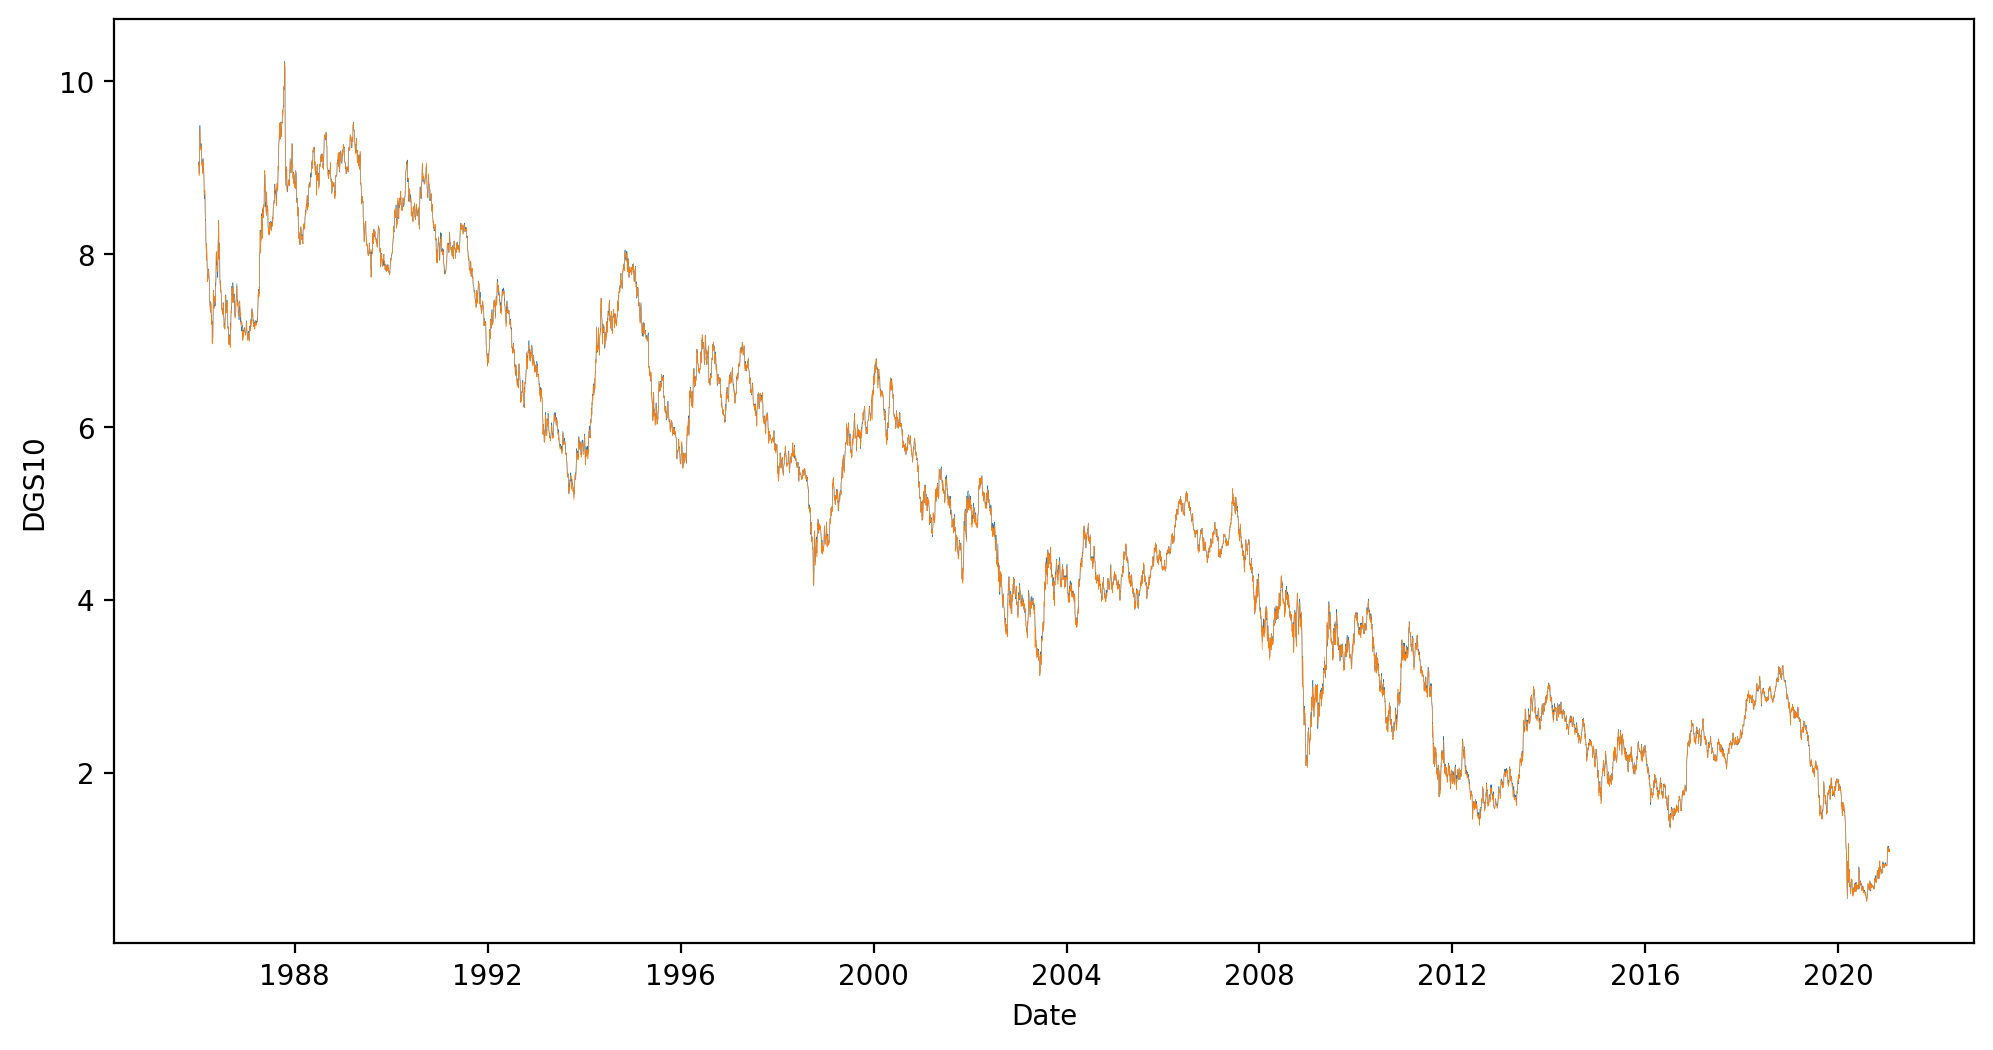

In [58]:
# Validate data
plt.figure(figsize=(12, 6), dpi=200)

sns.lineplot(data=merge_df, x='Date', y='DGS10', alpha=1, lw=0.2);
sns.lineplot(data=merge_df, x='Date', y='Bonds_income', alpha=1, lw=0.2);
merge_df.describe()

Данные по доходности совпадают в первом и втором датасете.
Учитываем как более надёжный источник данные с сайта https://fred.stlouisfed.org/series/dgs10
Заполняем 189 строк отуствующих значений данными с сайта https://ru.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data

In [73]:
merge_df['DGS10'] = merge_df['DGS10'].fillna(merge_df['Bonds_income'])
merge_df

,Date,DGS10,Bonds_income
0,1986-01-02,9.04,9.02
1,1986-01-03,9.05,9.03
2,1986-01-06,9.07,9.05
3,1986-01-07,8.94,8.91
4,1986-01-08,9.13,9.10
...,...,...,...
9142,2021-01-18,1.10,1.10
9143,2021-01-19,1.10,1.09
9144,2021-01-20,1.10,1.08
9145,2021-01-21,1.12,1.11


In [24]:
print(df_bonds.info())
print()
df_bonds.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8957 entries, 0 to 3956
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8957 non-null   datetime64[ns]
 1   Bonds_income  8957 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 209.9 KB
None



,Date,Bonds_income
count,8957,8957.000000
mean,2003-09-15 14:03:33.017751296,4.786999
min,1986-01-02 00:00:00,0.512000
25%,1995-01-16 00:00:00,2.725000
50%,2003-10-06 00:00:00,4.620000
75%,2012-07-02 00:00:00,6.547000
max,2021-01-22 00:00:00,10.222000
std,NaN,2.272430


In [77]:
# Join data

df_train = pd.merge(df, test_df, how='inner', on='Date')
df_train

,Date,Open,High,Low,Close,Dividends,VIX_Close,Bonds_income,DGS10
0,1986-01-02,9.969467,9.969467,9.969467,9.969467,0.0,18.07,9.025,9.04
1,1986-01-03,10.035052,10.035052,10.035052,10.035052,0.0,17.96,9.033,9.05
2,1986-01-06,10.030688,10.030688,10.030688,10.030688,0.0,17.05,9.048,9.07
3,1986-01-07,10.179354,10.179354,10.179354,10.179354,0.0,17.39,8.915,8.94
4,1986-01-08,9.899508,9.899508,9.899508,9.899508,0.0,19.97,9.105,9.13
...,...,...,...,...,...,...,...,...,...
8828,2021-01-15,347.940002,347.940002,347.940002,347.940002,0.0,24.34,1.087,1.11
8829,2021-01-19,350.779999,350.779999,350.779999,350.779999,0.0,23.24,1.092,1.10
8830,2021-01-20,355.670013,355.670013,355.670013,355.670013,0.0,21.58,1.077,1.10
8831,2021-01-21,355.809998,355.809998,355.809998,355.809998,0.0,21.32,1.109,1.12


In [78]:
print(df_train.info())

# Обнаружены пустые значения в Bonds_income

df_train.loc[df_train['DGS10'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8833 non-null   datetime64[ns]
 1   Open          8833 non-null   float64       
 2   High          8833 non-null   float64       
 3   Low           8833 non-null   float64       
 4   Close         8833 non-null   float64       
 5   Dividends     8833 non-null   float64       
 6   VIX_Close     8833 non-null   float64       
 7   Bonds_income  8748 non-null   float64       
 8   DGS10         8813 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 621.2+ KB
None


,Date,Open,High,Low,Close,Dividends,VIX_Close,Bonds_income,DGS10
448,1987-10-12,14.311877,14.311877,14.311877,14.311877,0.0,24.59,NaN,NaN
470,1987-11-11,11.221026,11.221026,11.221026,11.221026,0.0,55.55,NaN,NaN
515,1988-01-18,11.739610,11.739610,11.739610,11.739610,0.0,35.19,NaN,NaN
700,1988-10-10,13.297021,13.297021,13.297021,13.297021,0.0,19.67,NaN,NaN
724,1988-11-11,12.845943,12.845943,12.845943,12.845943,0.0,22.92,NaN,NaN
767,1989-01-16,13.699420,13.699420,13.699420,13.699420,0.0,17.19,NaN,NaN
952,1989-10-09,17.757084,17.757084,17.757084,17.757084,0.0,16.37,NaN,NaN
1019,1990-01-15,16.774876,16.774876,16.774876,16.774876,0.0,26.34,NaN,NaN
1204,1990-10-08,16.007051,16.007051,16.007051,16.007051,0.0,28.04,NaN,NaN
1229,1990-11-12,16.368912,16.368912,16.368912,16.368912,0.0,25.60,NaN,NaN


In [5]:
from datetime import datetime, timedelta

(354.739990 / 9.969467) ** (1/35) - 1

0.10744225878493507

Null values:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
VIX_Close       0
dtype: int64
Duplicates:
2


*Данные не содержат пустых значений, но есть повторяющиеся строки, необходимо проверить и удалить дубли*

In [7]:
print(df.loc[df.duplicated(keep=False)])
df = df.drop_duplicates()
print('Double check:')
df.loc[df.duplicated(keep=False)]

                 Open       High        Low      Close  Volume  Dividends  \
1986-05-12  11.430278  11.430278  11.430278  11.430278       0        0.0   
1986-05-14  11.430278  11.430278  11.430278  11.430278       0        0.0   
1994-09-01  26.975819  26.975819  26.975819  26.975819       0        0.0   
1994-09-08  26.975819  26.975819  26.975819  26.975819       0        0.0   

            Stock Splits  VIX_Close  
1986-05-12             0      19.42  
1986-05-14             0      19.42  
1994-09-01             0      11.86  
1994-09-08             0      11.86  
Double check:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,VIX_Close


In [8]:
df.sort_values('Day').head(10)

KeyError: 'Day'

В данных видны пропущенные даты, отсутсвуют записи за 1986-01-11 и 1986-01-12 число.
Так же можно заметить что данные 

In [ ]:
from datetime import datetime

df['Day'].apply(lambda x: x.weekday())